In [9]:

#K-MEANS CLUSTERING TUTORIAL

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
from IPython.display import HTML


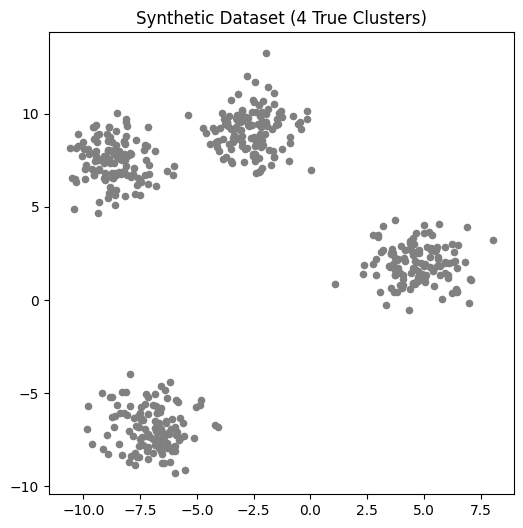

In [10]:

#GENERATE A SIMPLE SYNTHETIC DATASET (4 clusters)

X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.1,
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=20, c='gray')
plt.title("Synthetic Dataset (4 True Clusters)")
plt.show()


In [11]:

#2.RUN K-MEANS WITH DIFFERENT INITIALISATIONS


def run_kmeans_with_init(init_method, n_init=1):
    kmeans = KMeans(
        n_clusters=4,
        init=init_method,    #"random" or "k-means++"
        n_init=n_init,
        random_state=42
    )
    labels = kmeans.fit_predict(X)

    plt.figure(figsize=(6,6))
    plt.scatter(X[:,0], X[:,1], c=labels, s=20, cmap="tab10")
    plt.scatter(
        kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        c='red', s=200, marker='X'
    )
    plt.title(f"K-Means Result: init='{init_method}'")
    plt.show()


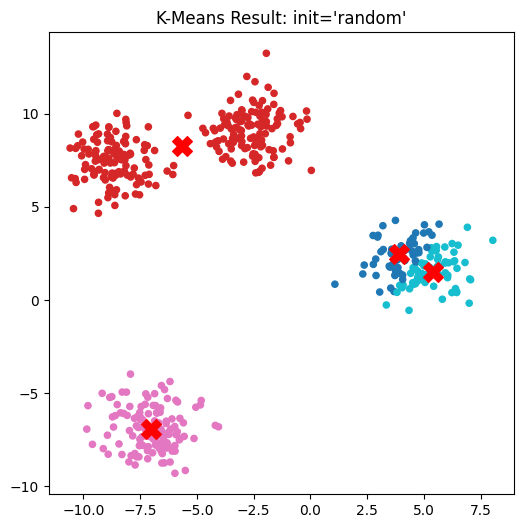

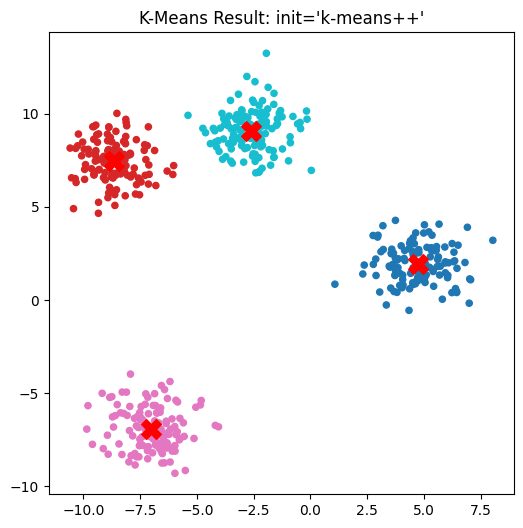

In [12]:
#RANDOM INITIALISATION (unstable)
run_kmeans_with_init("random")

#K-MEANS++ INITIALISATION (stable)
run_kmeans_with_init("k-means++")


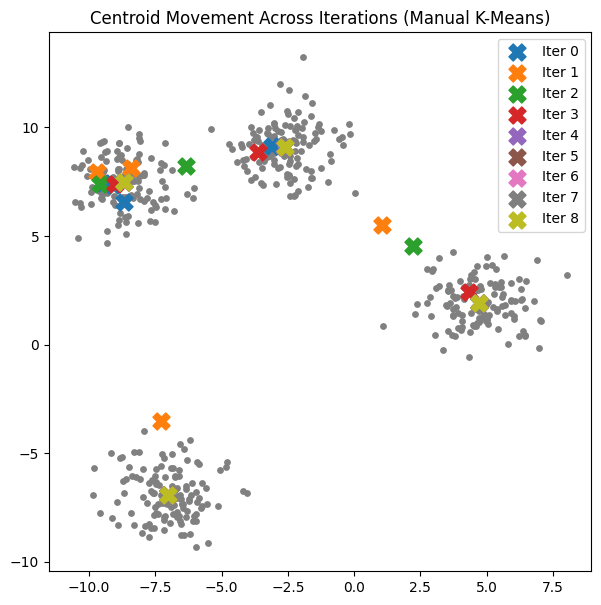

In [13]:

#3.VISUALISE CENTROID MOVEMENT OVER ITERATIONS


k = 4
np.random.seed(42)
initial_centroids = X[np.random.choice(len(X), k, replace=False)]

centroids = [initial_centroids]
current_centroids = initial_centroids.copy()

for _ in range(8):   #8 manual iterations
    #Assignment step
    distances = np.linalg.norm(X[:, None] - current_centroids[None, :], axis=2)
    labels = np.argmin(distances, axis=1)

    #Update step
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    centroids.append(new_centroids)
    current_centroids = new_centroids

#Plot centroid evolution
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], s=15, c='gray')

for i, c in enumerate(centroids):
    plt.scatter(c[:,0], c[:,1], s=150, marker="X", label=f"Iter {i}")

plt.legend()
plt.title("Centroid Movement Across Iterations (Manual K-Means)")
plt.show()


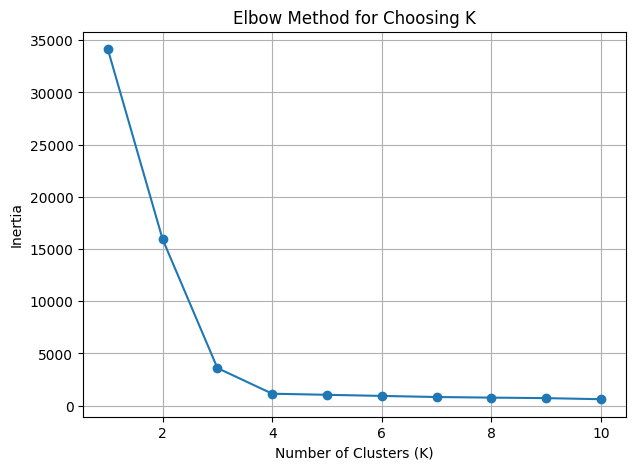

In [14]:

#4. ELBOW METHOD TO CHOOSE K


inertias = []
K_values = range(1, 11)

for k in K_values:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Method for Choosing K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


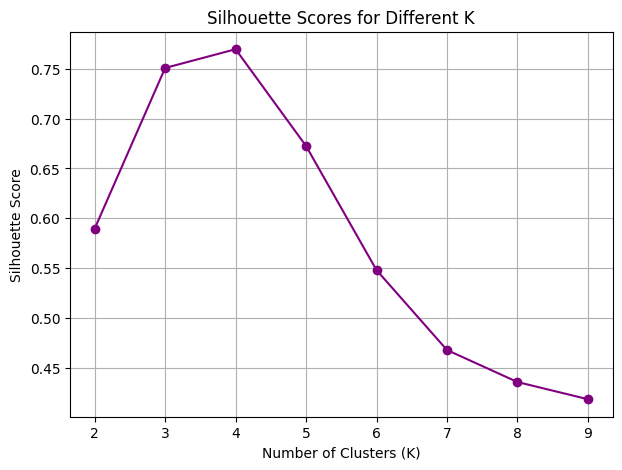

In [15]:

#5. SILHOUETTE ANALYSIS


sil_scores = []
K_values = range(2, 10)

for k in K_values:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(7,5))
plt.plot(K_values, sil_scores, marker='o', color='purple')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


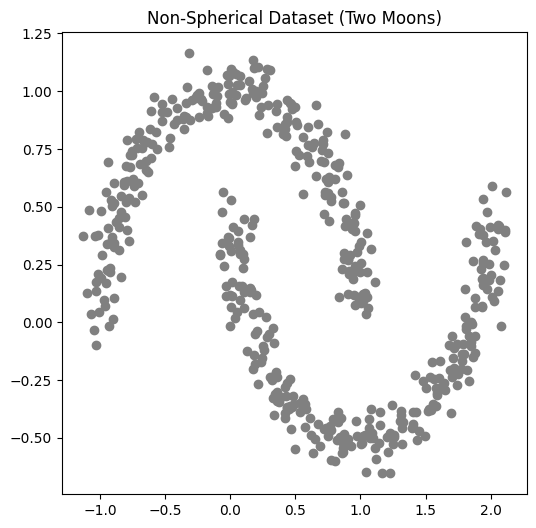

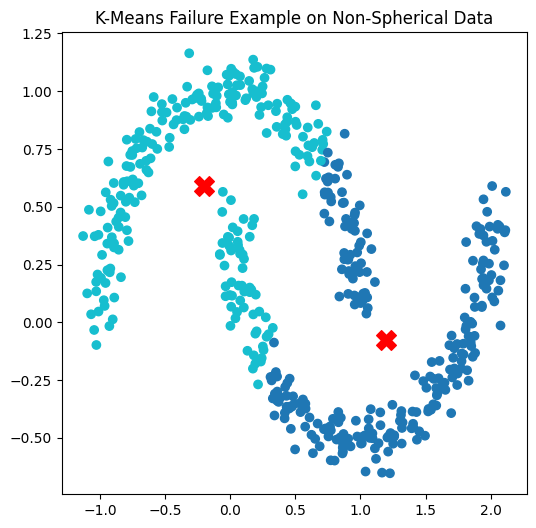

In [16]:

#6. FAILURE CASE (NON-SPHERICAL CLUSTERS)

X_moons, _ = make_moons(n_samples=500, noise=0.07, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X_moons[:,0], X_moons[:,1], c='gray')
plt.title("Non-Spherical Dataset (Two Moons)")
plt.show()

km = KMeans(n_clusters=2, random_state=42)
labels_moons = km.fit_predict(X_moons)

plt.figure(figsize=(6,6))
plt.scatter(X_moons[:,0], X_moons[:,1], c=labels_moons, cmap="tab10")
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    c="red", s=200, marker="X"
)
plt.title("K-Means Failure Example on Non-Spherical Data")
plt.show()
